# זרימה פוטנציאלית מעל גבעה– lab_partA

במחברת זו נבצע הדמיה של זרימה פוטנציאלית מעל גבשושית על ידי סופרפוזיציה של **זרימה אחידה** עם **מקור** בעוצמה מותאמת כך שנקודת הסטגנציה תתרחש בגובה $h = 40$ מטר.

## פרמטרים:
- מהירות אינסופית: $U_\infty = 20$ m/s  
- גובה הגבעה: $h = 40$ m  
- עוצמת מקור מחושבת לפי:  $m = 2\pi U_\infty h$

In [32]:
# הגדרת פרמטרים
import numpy as np
import matplotlib.pyplot as plt

U_inf = 20      # m/s - מהירות הזרימה באינסוף
h = 40          # m - גובה הגבעה
m = 2 * np.pi * U_inf * h  # עוצמת המקור

#  רשת החישוב
N = 200
x = np.linspace(-100, 100, N)
y = np.linspace(-50, 150, N)
X, Y = np.meshgrid(x, y)
r = np.sqrt(X**2 + Y**2)
theta = np.arctan2(Y, X)


In [33]:
# פונקציית זרם כוללת = זרימה אחידה + מקור
psi_uniform = U_inf * Y
psi_source = m / (2 * np.pi) * theta
psi = psi_uniform + psi_source

# רכיבי המהירות מהפוטנציאל הכולל (u,v)
u = U_inf + (m / (2 * np.pi)) * (X / (r**2))
v = (m / (2 * np.pi)) * (Y / (r**2))
V = np.sqrt(u**2 + v**2)  # מהירות כוללת


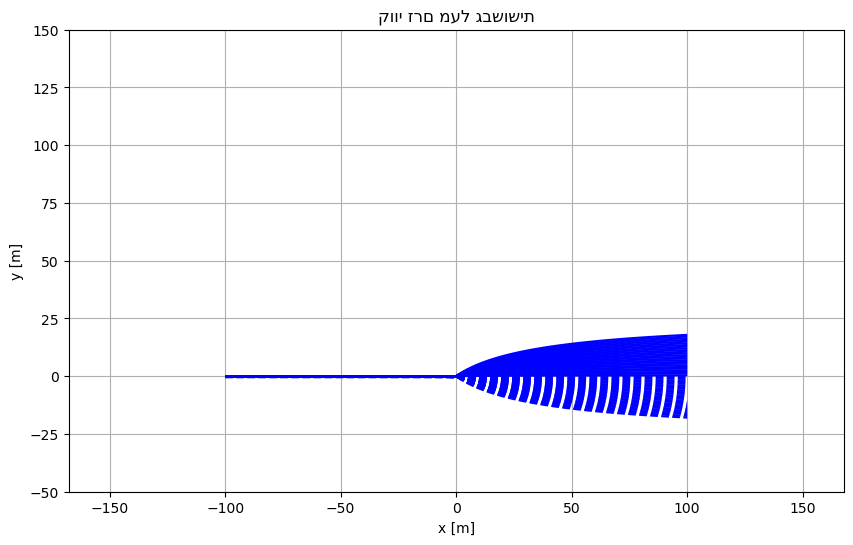

In [34]:
# מקדם לחץ Cp
Cp = 1 - (V / U_inf)**2

# גרף קווי זרם
plt.figure(figsize=(10, 6))
plt.contour(X, Y, psi, levels=np.linspace(-500, 500, 50), colors='b')
plt.title("קווי זרם מעל גבשושית")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.axis('equal')
plt.grid()
plt.show()


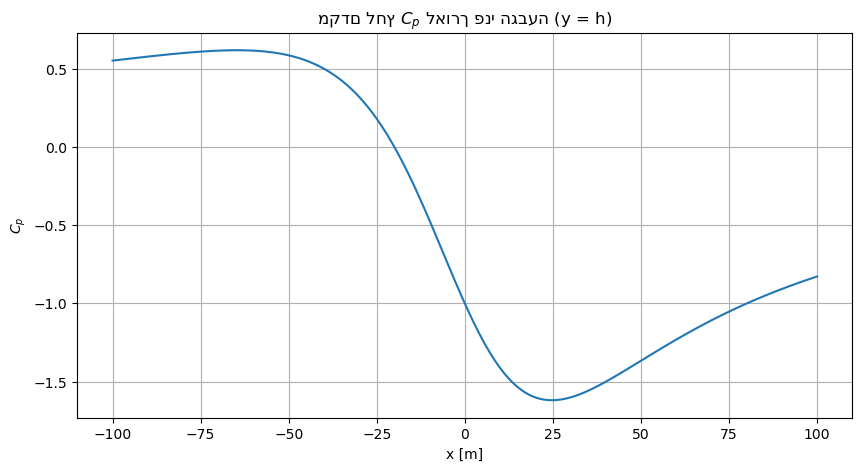

In [35]:
# Cp לאורך y = h (כלומר פני הגבעה)
x_line = np.linspace(-100, 100, 400)
y_line = np.full_like(x_line, h)
r_line = np.sqrt(x_line**2 + y_line**2)
V_line = np.sqrt((U_inf + (m / (2 * np.pi)) * (x_line / r_line**2))**2 +
                 ((m / (2 * np.pi)) * (y_line / r_line**2))**2)
Cp_line = 1 - (V_line / U_inf)**2

plt.figure(figsize=(10, 5))
plt.plot(x_line, Cp_line)
plt.title("מקדם לחץ $C_p$ לאורך פני הגבעה (y = h)")
plt.xlabel("x [m]")
plt.ylabel("$C_p$")
plt.grid()
plt.show()


In [36]:
import math
import numpy
from matplotlib import pyplot
N = 200                               # Number of points in each direction
x_start, x_end = -50.0, 200.0            # x-direction boundaries
y_start, y_end = -50.0, 50.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

In [37]:
numpy.shape(X)

(200, 200)

In [38]:
u_inf = 20.0        # freestream speed

# compute the freestream velocity field
u_freestream = u_inf * numpy.ones_like(X)
v_freestream = numpy.zeros_like(X)

# compute the stream-function
psi_freestream = Y * u_inf 

In [39]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * numpy.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * numpy.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

In [40]:
??get_velocity


In [41]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (2 * numpy.pi) * numpy.arctan2((Y - ys), (X - xs))
    
    return psi

In [42]:
strength_source = 1600
q=strength_source
x_source, y_source = 0.0, 0.0   # location of the source

u_source = strength_source / (2 * numpy.pi) * (X - x_source) / ((X - x_source)**2 + (Y - y_source)**2)
v_source = strength_source / (2 * numpy.pi) * (Y - y_source) / ((X - x_source)**2 + (Y - y_source)**2)
psi_source = strength_source / (2 * numpy.pi) * numpy.arctan2(Y - y_source, X - x_source)


Maximum velocity outside the body: V_max = 25.185 m/s
At location: x = 12.81, y = 25.88


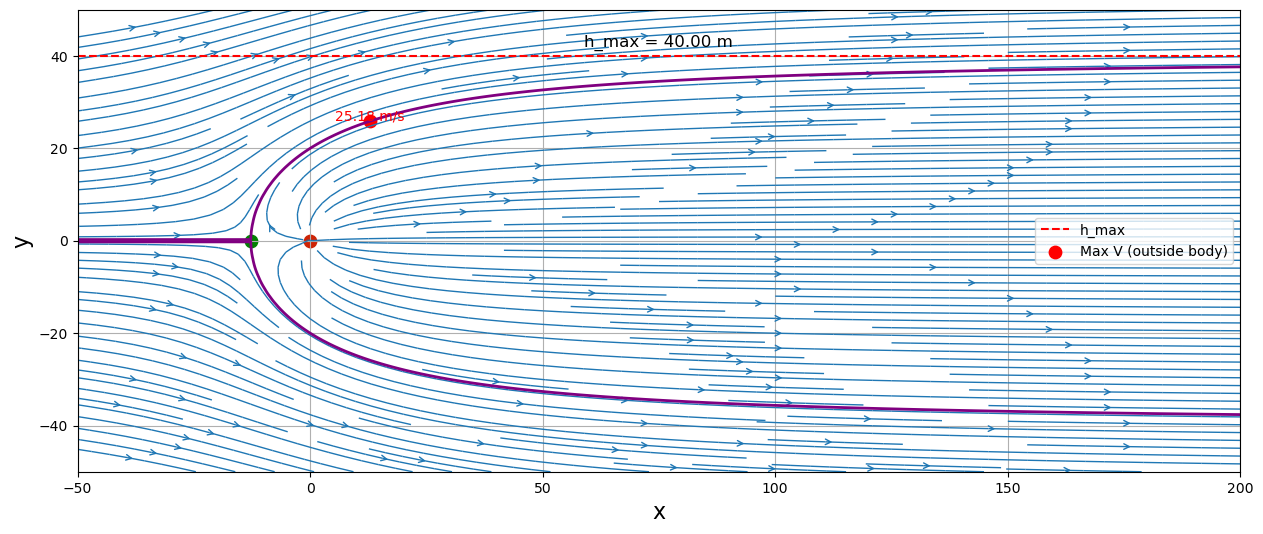

In [43]:
# superposition of the source on the freestream
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

# plot the streamlines
width = 15
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

# calculate the stagnation point
x_stagnation = x_source - strength_source / (2 * numpy.pi * u_inf)
y_stagnation = y_source

# display the stagnation point
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# display the dividing streamline
pyplot.contour(X, Y, psi, 
               levels=[-strength_source / 2, strength_source / 2], 
               colors='purple', linewidths=2, linestyles='solid');

h_max = strength_source / (2 *  u_inf)
#pyplot.scatter(200, h_max, color='red', s=80, label='h_max')
pyplot.axhline(y=h_max,color='red', linestyle='--', linewidth=1.5, label='h_max')
pyplot.text(75, h_max + 2, f'h_max = {h_max:.2f} m', ha='center', fontsize=12)

# קו הזרם של גוף רנקין
psi_body = q / 2

# מסכה: רק נקודות שבהן psi < q/2 → מחוץ לגוף
outside_body = psi > psi_body

# מהירויות באזורים שמחוץ לגוף
V = numpy.sqrt(u**2 + v**2)
V_outside = numpy.where(outside_body, V, -numpy.inf)
V_max = numpy.max(V_outside)

# מיקום המהירות המקסימלית
max_index = numpy.unravel_index(numpy.argmax(V_outside), V.shape)
x_max = X[max_index]
y_max = Y[max_index]

# תצוגה
print(f"Maximum velocity outside the body: V_max = {V_outside[max_index]:.3f} m/s")
print(f"At location: x = {x_max:.2f}, y = {y_max:.2f}")

# סימון על הגרף
pyplot.scatter(x_max, y_max, color='red', s=80, label='Max V (outside body)')
pyplot.text(x_max, y_max + 0.1, f'{V_outside[max_index]:.2f} m/s', color='red', ha='center')
pyplot.legend()

In [44]:
#strength_sink = -1600.0        # strength of the sink
#x_sink, y_sink = 1.0, 0.0   # location of the sink

# compute the velocity field on the mesh grid
#u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)

# compute the stream-function on the grid mesh
#psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)

In [45]:
# superposition of a source and a sink on the freestream
#u = u_freestream + u_source + u_sink
#v = v_freestream + v_source + v_sink
#psi = psi_freestream + psi_source + psi_sink

# plot the streamlines
#width = 10
#height = (y_end - y_start) / (x_end - x_start) * width
#pyplot.figure(figsize=(width, height))
#pyplot.xlabel('x', fontsize=16)
#pyplot.ylabel('y', fontsize=16)
#pyplot.xlim(x_start, x_end)
#pyplot.ylim(y_start, y_end)
#pyplot.streamplot(X, Y, u, v,
#                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
#pyplot.scatter([x_source, x_sink], [y_source, y_sink],
#               color='#CD2305', s=80, marker='o')
#pyplot.contour(X, Y, psi,
 #              levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

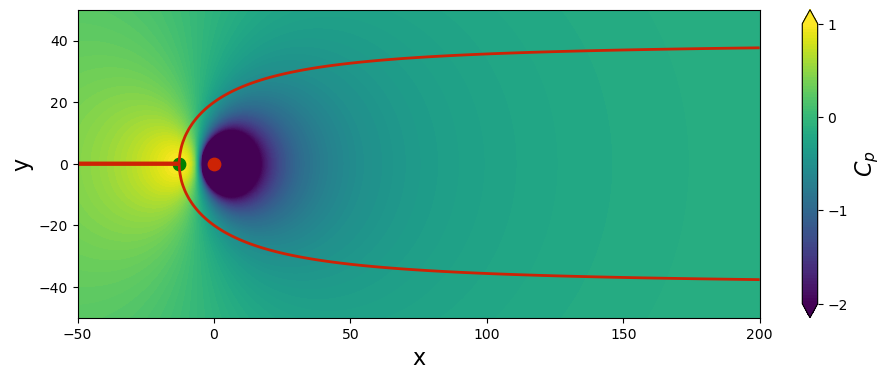

In [46]:
# compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, 
               levels=[-strength_source / 2, strength_source / 2], 
               colors='#CD2305', linewidths=2, linestyles='solid');
pyplot.show()



C:\Users\ido67\anaconda4\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\ido67\anaconda4\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


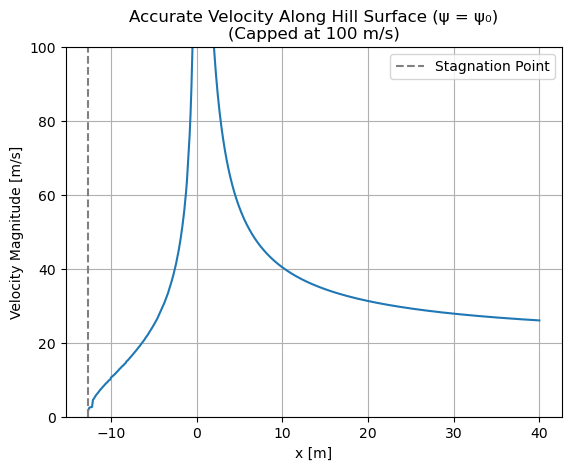

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# נתונים
U_inf = 20                      # מהירות הזרימה
sigma = 1600                   # עוצמת המקור
psi_0 = sigma / (2 * np.pi)    # קו הזרם על שפת הגבעה
x_stagnation = -sigma / (2 * np.pi * U_inf)

# פונקציית שיור לפתרון ψ(x, y) = ψ0
def stream_function_residual(y, x, U_inf, sigma, psi_0):
    return U_inf * y + (sigma / (2 * np.pi)) * np.arctan2(y, x) - psi_0

# פתרון נומרי עבור y(x) על שפת הגבעה
def compute_accurate_y_on_hill(x_vals, U_inf, sigma, psi_0):
    y_vals = []
    for x in x_vals:
        y_guess = 1.0
        y_solution, = fsolve(stream_function_residual, y_guess, args=(x, U_inf, sigma, psi_0))
        y_vals.append(y_solution)
    return np.array(y_vals)

# חישוב המהירות הכוללת לאורך שפת הגבעה
def compute_velocity_on_accurate_hill(x_vals):
    y_vals = compute_accurate_y_on_hill(x_vals, U_inf, sigma, psi_0)
    u = U_inf + sigma / (2 * np.pi) * x_vals / (x_vals**2 + y_vals**2)
    v = sigma / (2 * np.pi) * y_vals / (x_vals**2 + y_vals**2)
    V = np.sqrt(u**2 + v**2)
    return V, y_vals

# טווח x (נמנעים מ-x קרוב מדי לאפס בגלל סינגולריות)
x_vals = np.linspace(x_stagnation + 0.1, 40, 500)
V_vals, y_vals = compute_velocity_on_accurate_hill(x_vals)

# גרף עם הגבלת ציר y עד 100
plt.plot(x_vals, V_vals)
plt.axvline(x=x_stagnation, color='gray', linestyle='--', label='Stagnation Point')
plt.ylim(0, 100)  # הגבלת ציר y
plt.xlabel("x [m]")
plt.ylabel("Velocity Magnitude [m/s]")
plt.title("Accurate Velocity Along Hill Surface (ψ = ψ₀)\n(Capped at 100 m/s)")
plt.grid(True)
plt.legend()
plt.show()

In [48]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # creates a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # creates a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid
kappa = 1.0                        # strength of the doublet
x_doublet, y_doublet = 0.0, 0.0    # location of the doublet

In [49]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.

    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = (- strength / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (- strength / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)

    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """
    Returns the stream-function generated by a doublet.

    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = - strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)

    return psi

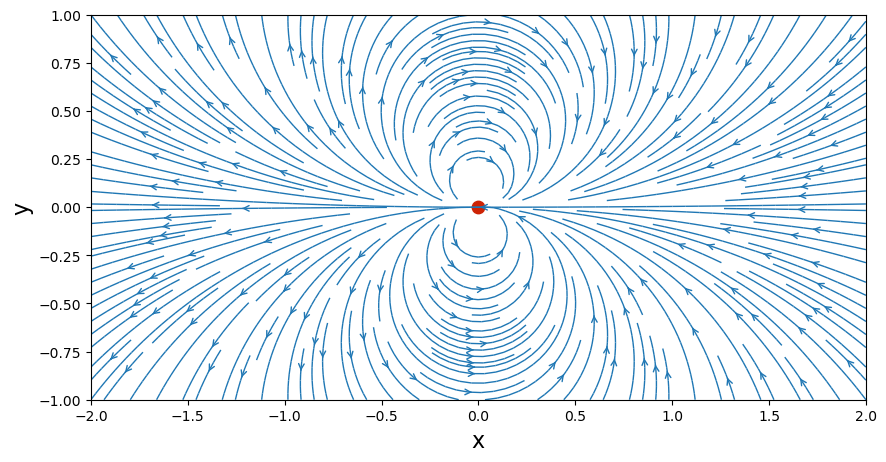

In [50]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_doublet, v_doublet,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

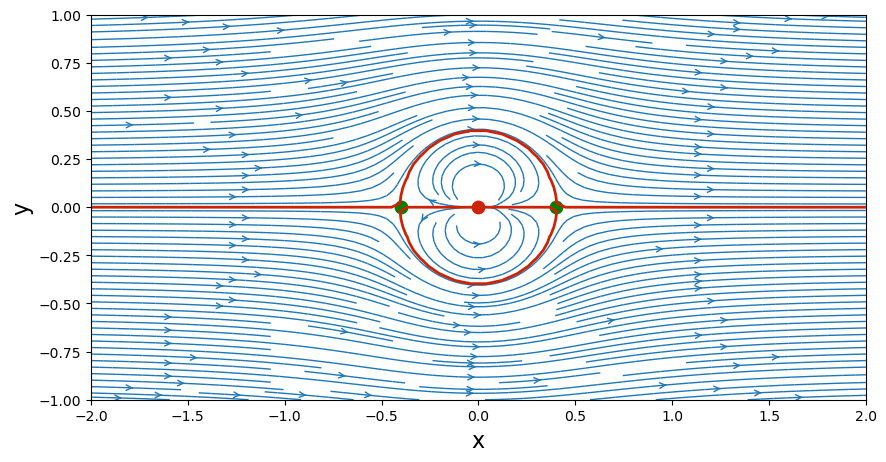

In [51]:
u_inf = 1.0        # freestream speed
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y
# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculate the stagnation points
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0

# display the stagnation points
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');

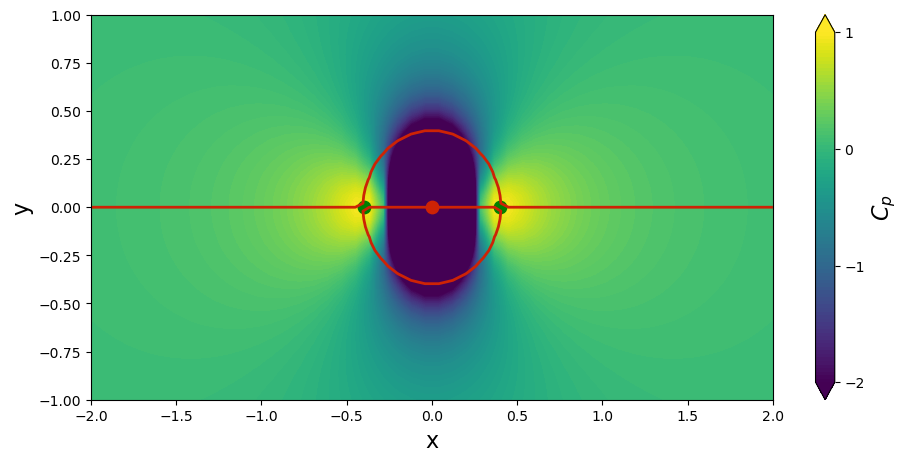

In [52]:
# compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_doublet, y_doublet,
               color='#CD2305', s=80, marker='o')
pyplot.contour(X,Y,psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');


In [53]:
N = 200# Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -2.0, 2.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid
gamma = 5.0                      # strength of the vortex
x_vortex, y_vortex = 0.0,0.0   # location of the vortex



In [54]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.

    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)

    return u, v
def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.

    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (4 * math.pi) * numpy.log((X - xv)**2 + (Y - yv)**2)

    return psi


In [55]:
# compute the velocity field on the mesh grid
u_vortex, v_vortex= get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)


# compute the stream-function on the mesh grid
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

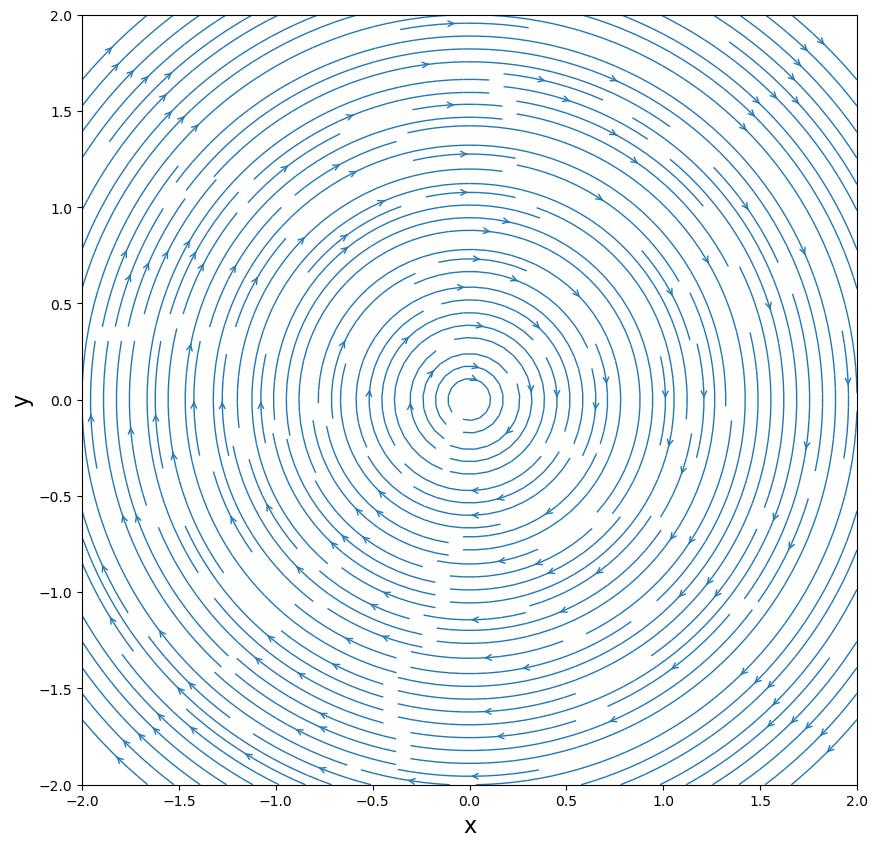

In [56]:
# plot the streamlines
u=u_vortex
v=v_vortex
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')

# pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

In [57]:
strength_sink = -1.0            # strength of the sink
x_sink, y_sink = 0.0, 0.0       # location of the sink
def get_velocity_sink(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a sink.

    Parameters
    ----------
    strength: float
        Strength of the sink.
    xs: float
        x-coordinate of the sink.
    ys: float
        y-coordinate of the sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * math.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * math.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)

    return u, v
def get_stream_function_sink(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a sink.

    Parameters
    ----------
    strength: float
        Strength of the sink.
    xs: float
        x-coordinate of the sink.
    ys: float
        y-coordinate of the sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (2 * math.pi) * numpy.arctan2((Y - ys), (X - xs))

    return psi
# compute the velocity field on the mesh grid
u_sink, v_sink = get_velocity_sink(strength_sink, x_sink, y_sink, X, Y)

# compute the stream-function on the mesh grid
psi_sink = get_stream_function_sink(strength_sink, x_sink, y_sink, X, Y)

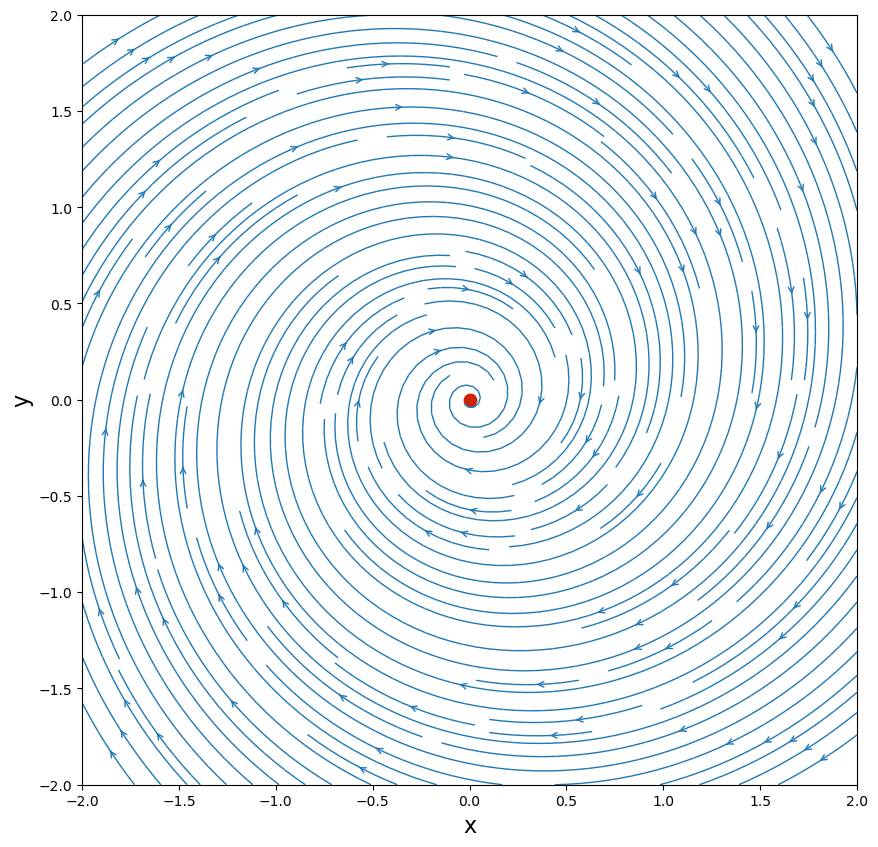

In [58]:
# superposition of the sink and the vortex
u = u_vortex + u_sink
v = v_vortex + v_sink
psi = psi_vortex + psi_sink

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

In [59]:
print(psi.shape)
print(V.shape)


(200, 200)
(200, 200)


In [60]:
print(numpy.any(outside_body))  # האם מחות לגוף יש נקודות
print(numpy.max(V))             # ערך מהירות מקסימלי
print(numpy.max(V_outside))     # ערך מהירות מקסימלי בחוץ

True
730.9307479576814
25.18473287550359
